In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
data_url="https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/all_month.csv"

In [3]:
df=pd.read_csv(data_url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9593 entries, 0 to 9592
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             9593 non-null   object 
 1   latitude         9593 non-null   float64
 2   longitude        9593 non-null   float64
 3   depth            9593 non-null   float64
 4   mag              9592 non-null   float64
 5   magType          9592 non-null   object 
 6   nst              8018 non-null   float64
 7   gap              8018 non-null   float64
 8   dmin             8017 non-null   float64
 9   rms              9592 non-null   float64
 10  net              9593 non-null   object 
 11  id               9593 non-null   object 
 12  updated          9593 non-null   object 
 13  place            9593 non-null   object 
 14  type             9593 non-null   object 
 15  horizontalError  7317 non-null   float64
 16  depthError       9592 non-null   float64
 17  magError      

In [5]:
features = ['latitude','longitude','depth']
label = 'mag'

In [6]:
# data preprocessing 
df = df.dropna(subset=[label])

In [7]:
for i in features:
    df[i]=df[i].fillna(df[i].median())

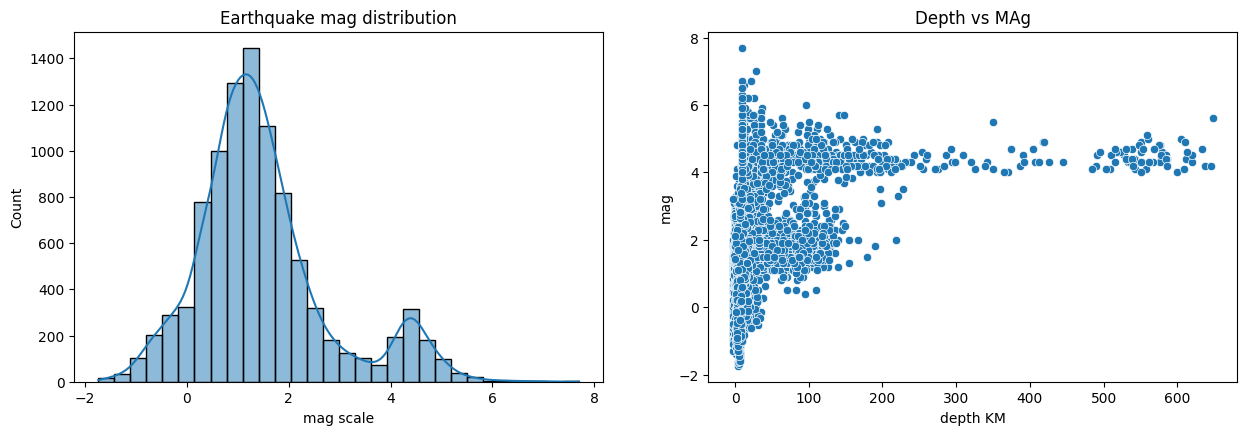

In [11]:
# do some analysis using visuals
plt.figure(figsize=(15,10))
# mag distribution
plt.subplot(2,2,1)
plt.title("Earthquake mag distribution")
plt.xlabel("mag scale")
sb.histplot(df[label],kde=True,bins=30)

# Depth vs Mag 
plt.subplot(2,2,2)
plt.title("Depth vs MAg")
plt.xlabel("depth KM")
sb.scatterplot(x='depth',data=df,y=label)

plt.show()

In [12]:
# select feature data
features_data = df[features]
label_data = df[label]
print(features_data)

       latitude   longitude  depth
0     38.840668 -122.834335   1.32
1     61.556800 -141.271600  13.40
2     61.789200 -149.608200  38.70
3     60.081400 -152.528700  97.80
4     35.639833 -117.548500   8.08
...         ...         ...    ...
9588  44.739000 -111.123333   7.15
9589  37.428500 -119.018500   3.69
9590  44.726000 -111.120667   2.38
9591 -57.288500  147.327500  10.00
9592  39.360500 -111.194500  -0.61

[9592 rows x 3 columns]


In [14]:
# split in data 
train_ft,test_ft,train_lb,test_lb=train_test_split(features_data,label_data,test_size=0.15)

In [16]:
# calling model 
model = RandomForestRegressor()

In [17]:
# training 
rg_trained = model.fit(train_ft,train_lb)

In [18]:
# prediction 
predicted_values = rg_trained.predict(test_ft)

In [ ]:
# eval part / checking accuracy as well
